# Importar librerias

In [1]:
### Leer librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar conjunto de datos

In [2]:
review = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

In [3]:
review.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


# Análisis Exploratorio

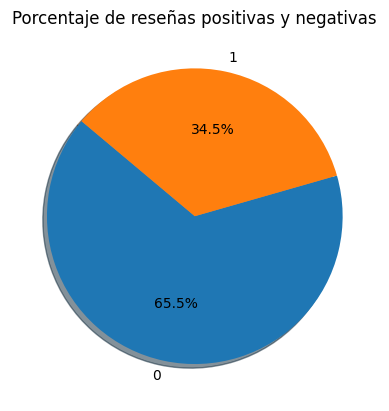

In [6]:
polarity = review['polarity'].value_counts()

## Grafico
plt.pie(polarity, labels=polarity.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Porcentaje de reseñas positivas y negativas")
plt.show()


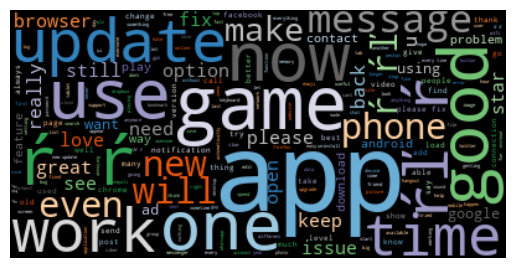

In [11]:
## Leer libreria
from wordcloud import WordCloud

txt = " ".join(str(coments).lower() for coments in review["review"])
wordcloud = WordCloud(colormap='tab20c').generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Transformaciones

In [12]:
review["review"] = review["review"].str.strip().str.lower()

In [14]:
## Datraframe transformado

clean_review = review[["review", "polarity"]]

In [15]:
clean_review.head()

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


# Modelado

In [16]:
from sklearn.model_selection import train_test_split

X = clean_review['review']
y = clean_review['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [17]:
X_train

331    just did the latest update on viber and yet ag...
733    keeps crashing it only works well in extreme d...
382    the fail boat has arrived the 6.0 version is t...
704    superfast, just as i remember it ! opera mini ...
813    installed and immediately deleted this crap i ...
                             ...                        
106    why can't i share my achievements? recently di...
270    beta is the best version of the chrome browser...
860    great little game. this is a great little game...
435    keeps crashing ever since i started using it m...
102    even though i am loving the new update, but th...
Name: review, Length: 712, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()